In [1]:
using Plots, Measures, HDF5

include("../src/LoadData.jl")
include("../src/Support.jl")

# Load data
Y = loadData("NZCOVID_1APR2024");

# Calculate aggregated cases
Y.WeeklyCases = repeat([NaN], length(Y.Ct))
for ii = 1:length(Y.Ct)
    if ii % 7 == 0
        Y.WeeklyCases[ii] = sum(Y.Ct[ii-6:ii])
    end
end

# Load saved files
Xagg = h5read("temp/temporallyAggregatedResults.h5", "X")
θagg = h5read("temp/temporallyAggregatedResults.h5", "theta")

Xdow = h5read("temp/dayofweekResults.h5", "X")
θdow = h5read("temp/dayofweekResults.h5", "theta")

# Process results
(mR_agg, medR_agg, lR_agg, uR_agg) = processResults(Xagg[:,:,1])
(mI_agg, medI_agg, lI_agg, uI_agg) = processResults(Xagg[:,:,2])
(mC_agg, medC_agg, lC_agg, uC_agg) = processResults(Xagg[:,:,3])

(mR_dow, medR_dow, lR_dow, uR_dow) = processResults(Xdow[:,:,1])
(mI_dow, medI_dow, lI_dow, uI_dow) = processResults(Xdow[:,:,2])
(mC_dow, medC_dow, lC_dow, uC_dow) = processResults(Xdow[:,:,3])


([0.0, 684.745397, 631.141429, 510.283738, 446.129427, 291.260384, 340.728911, 554.004801, 485.369048, 439.444326  …  205.218819, 359.377771, 340.294533, 334.189999, 301.474163, 296.867106, 225.422576, 312.243517, 618.362051, 700.782388], [0.0, 682.0, 628.0, 508.0, 444.0, 290.0, 339.0, 551.0, 483.0, 437.0  …  146.0, 242.0, 215.0, 197.0, 163.0, 147.0, 99.0, 119.0, 197.0, 175.0], [0.0, 529.0, 488.0, 394.0, 345.0, 222.0, 260.0, 429.0, 375.0, 338.0  …  33.0, 51.0, 42.0, 35.0, 26.0, 21.0, 13.0, 14.0, 22.0, 18.0], [0.0, 858.0, 791.0, 639.0, 560.0, 369.0, 432.0, 697.0, 611.0, 554.0  …  712.0, 1309.0, 1301.0, 1327.0, 1234.0, 1240.0, 938.0, 1263.0, 2368.0, 2398.0])

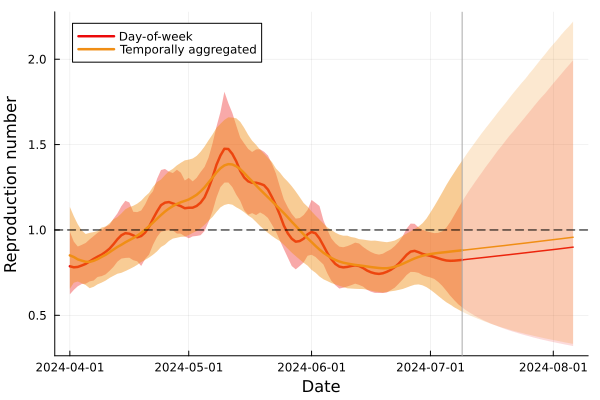

In [3]:
# Plot reproduction number estimates
pltR = plot(xlabel="Date", ylabel="Reproduction number")

plot!(Y.date[1:100], mR_dow[1:100], ribbon = (mR_dow[1:100]-lR_dow[1:100], uR_dow[1:100]-mR_dow[1:100]), color="#eb0a0a", fillalpha=0.35, linewidth=2.5, label="Day-of-week")
plot!(Y.date[1:100], mR_agg[1:100], ribbon = (mR_agg[1:100]-lR_agg[1:100], uR_agg[1:100]-mR_agg[1:100]), color="#f08e15", fillalpha=0.45, linewidth=2.5, label="Temporally aggregated")

plot!(Y.date[100:128], mR_dow[100:end], ribbon = (mR_dow[100:end]-lR_dow[100:end], uR_dow[100:end]-mR_dow[100:end]), color="#eb0a0a", fillalpha=0.15, linewidth=1.5, label=false)
plot!(Y.date[100:128], mR_agg[100:end], ribbon = (mR_agg[100:end]-lR_agg[100:end], uR_agg[100:end]-mR_agg[100:end]), color="#f08e15", fillalpha=0.2, linewidth=1.5, label=false)

hline!([1] , label=false, color=:black, line=:dash)
vline!([Y.date[100]], label=false, color=:darkgray)


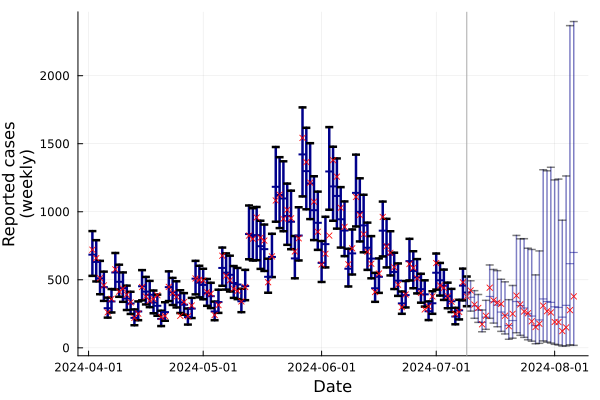

In [17]:
# Plot observed cases (day-of-week model)
pltC_dow = plot(xlabel="Date", ylabel="Reported cases\n(weekly)")
scatter!(Y.date[2:100], mC_dow[2:100], errorbar=(mC_dow[2:100]-lC_dow[2:100], uC_dow[2:100]-mC_dow[2:100]),
    label=false, marker=:hline, color=:darkblue, lc=:darkblue, linewidth=2.5, markerstrokewidth=2.5)
scatter!(Y.date[101:128], mC_dow[101:end], errorbar=(mC_dow[101:end]-lC_dow[101:end], uC_dow[101:end]-mC_dow[101:end]),
    label=false, marker=:hline, color=:darkblue, lc=:darkblue, linewidth=1.5, markerstrokewidth=1.5, alpha=0.5)
scatter!(Y.date[2:128], Y.Ct[2:128], color=:red, marker=:x, label=false, markerstrokewidth=1, markersize=3)
vline!([Y.date[100]], label=false, color=:darkgray)

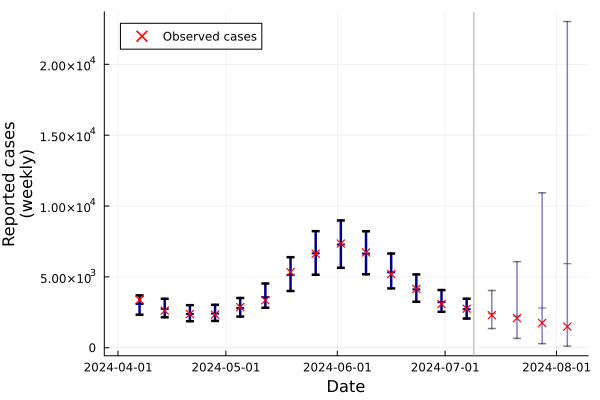

In [18]:
# Plot observed cases (temporally aggregated model)
weekly_cases = Y.WeeklyCases[1:128]
mC_agg[isnan.(weekly_cases)] .= NaN
lC_agg[isnan.(weekly_cases)] .= NaN
uC_agg[isnan.(weekly_cases)] .= NaN

pltC_agg = plot(xlabel="Date", ylabel="Reported cases\n(weekly)")
scatter!(Y.date[1:100], mC_agg[1:100], errorbar=(mC_agg[1:100]-lC_agg[1:100], uC_agg[1:100]-mC_agg[1:100]),
    label=false, marker=:hline, color=:darkblue, lc=:darkblue, linewidth=2.5, markerstrokewidth=2.5)
scatter!(Y.date[101:128], mC_agg[101:end], errorbar=(mC_agg[101:end]-lC_agg[101:end], uC_agg[101:end]-mC_agg[101:end]),
    label=false, marker=:hline, color=:darkblue, lc=:darkblue, linewidth=1.5, markerstrokewidth=1.5, alpha=0.5)
scatter!(Y.date[1:128], Y.WeeklyCases[1:128], color=:red, marker=:x, label="Observed cases", markerstrokewidth=1.5, markersize=4)
vline!([Y.date[100]], label=false, color=:darkgray)

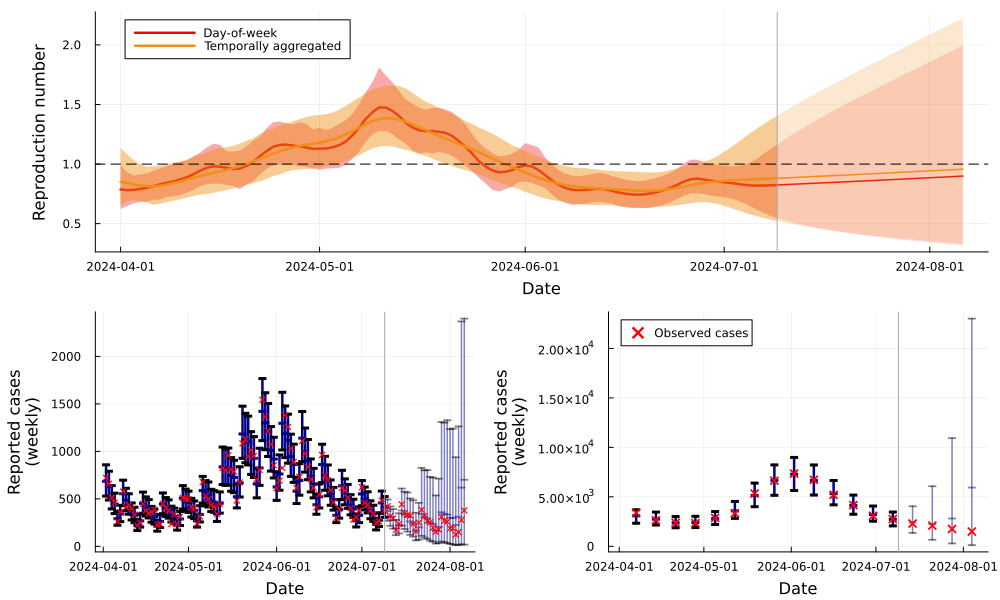

In [25]:
# Plot them all together
pltLower = plot(pltC_dow, pltC_agg, layout=(1,2))
plt = plot(pltR, pltLower, layout=(2,1), size=(1000, 600), left_margin=5mm, bottom_margin=2mm)
png("figures/temporalmodels.png")
display(plt)

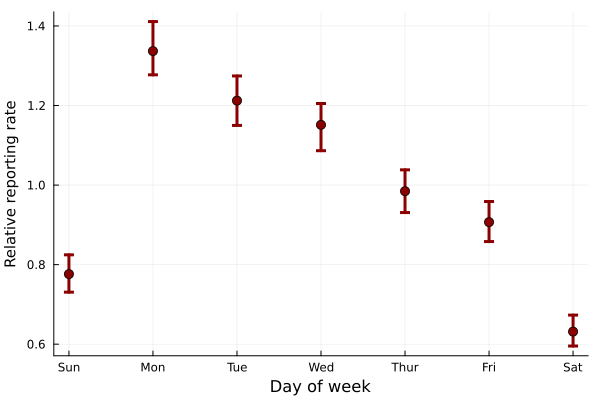

In [30]:
# Also plot daily reporting rates
θlong = resizeParams(θdow)
day_of_week_samples = zeros(size(θlong, 1), 7)
day_of_week_samples[:,1:6] = θlong[:,3:8]
day_of_week_samples[:,7] = 7 .- sum(θlong[:,3:8], dims=2)
m = mean(day_of_week_samples, dims=1)[1:end]
l = [quantile(day_of_week_samples[:,ii], 0.025) for ii = 1:7]
u = [quantile(day_of_week_samples[:,ii], 0.975) for ii = 1:7]

day_of_week_label = ["Sun", "Mon", "Tue", "Wed", "Thur", "Fri", "Sat"]

plt_dow = scatter(day_of_week_label, m, errorbar=(m-l, u-m),
    xlabel="Day of week", ylabel="Relative reporting rate", legend=false,
    linewidth=3, color=:darkred, lc=:darkred, markercolor=:darkred, markersize=5,
    yguidefont=font(10), xguidefont=font(10))
png("figures/dayofweekeffect.png")
display(plt_dow)